In [142]:
# Import Python Libraries
import pandas as pd
import numpy as np
# plotting
import matplotlib as mpl
import seaborn as sns
# machine learning package 
import sklearn as skl
# package to use regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LassoCV

In [73]:
#import pandas as pd
df = pd.read_csv("bank-full.csv")

In [74]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


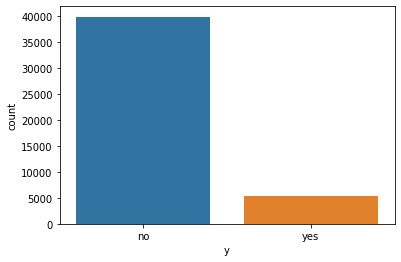

In [76]:
#customers subscribed to term deposit
sns.countplot(x=df['y'],data=df)

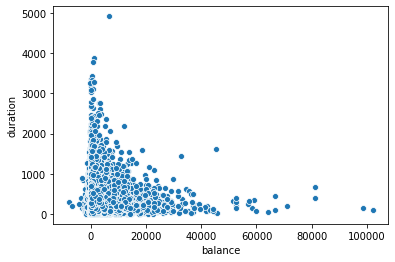

In [77]:
sns.scatterplot(x='balance',y='duration',data=df)

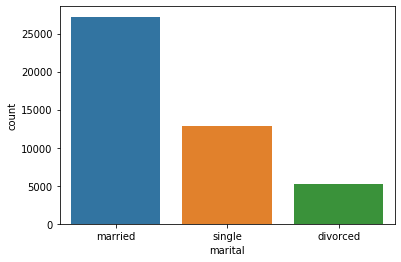

In [78]:
#customers subscribed to term deposit
sns.countplot(x=df['marital'],data=df)

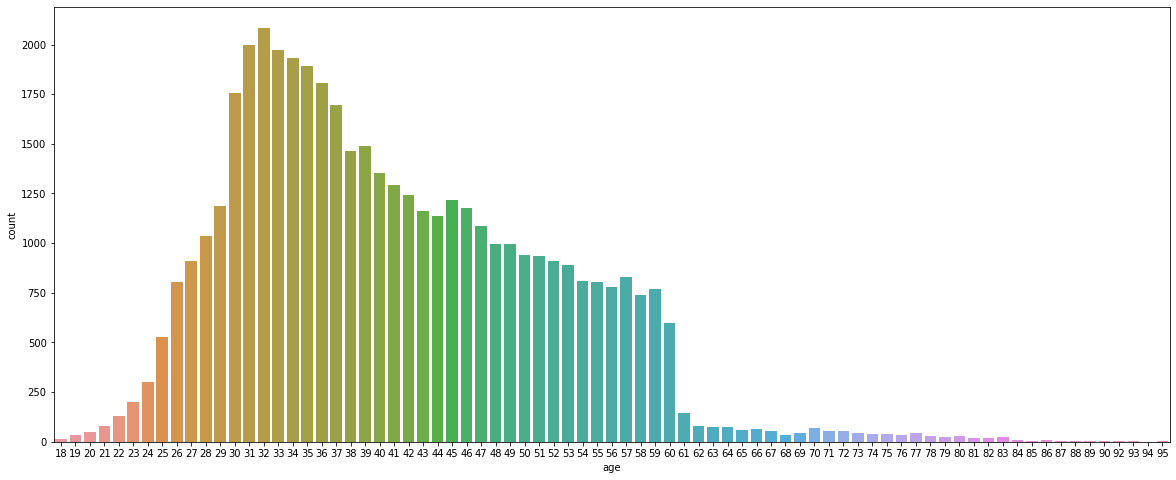

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)

In [80]:
#Tenure to categorical column
def age_cat(df) :
    
    if df["age"] <= 25 :
        return "Age_ls_25"
    elif (df["age"] > 25) & (df["age"] <= 35 ):
        return "Age_25-35"
    elif (df["age"] > 35) & (df["age"] <= 45 ):
        return "Age_35-45"
    elif (df["age"] > 45) & (df["age"] <= 55 ):
        return "Age_45-55"
    elif (df["age"] > 55) & (df["age"] <= 65 ):
        return "Age_55-65"   
    elif df["age"] > 65 :
        return "Age_gt_65"
df["Age_group"] = df.apply(lambda df:age_cat(df),axis = 1)

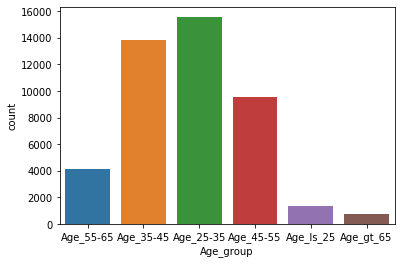

In [81]:
#customers subscribed to term deposit
sns.countplot(x=df['Age_group'],data=df)

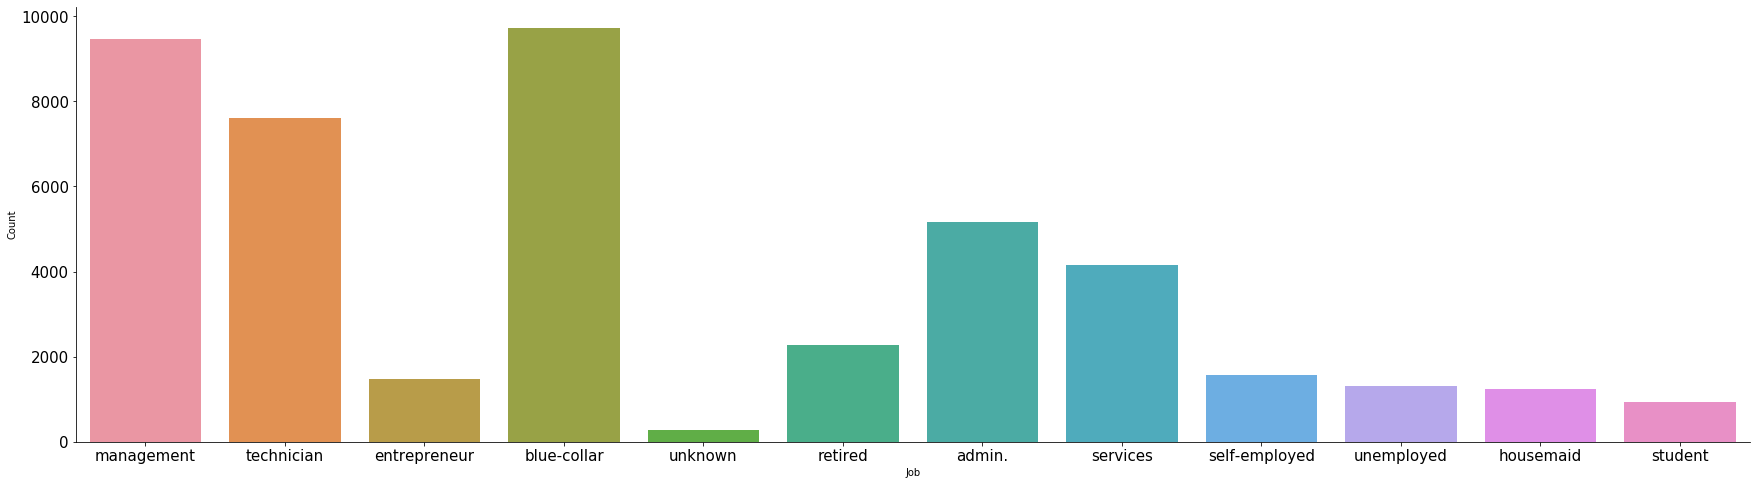

In [141]:
#What kind of jobs clients this bank have
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job')
ax.set_ylabel('Count')
ax.tick_params(labelsize=15)
sns.despine()

In [82]:
df_label = df.copy(deep=True)

In [83]:
df_label.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Age_55-65
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Age_35-45
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Age_25-35
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Age_45-55
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Age_25-35


In [84]:
#Label encoding
df_labeled=pd.DataFrame()

for col in df_label.columns:
    le = preprocessing.LabelEncoder()
    df_labeled[col]=le.fit_transform(df_label[col])

In [91]:
df_labeled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_group
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0,3
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0,1
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0,2
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0,0


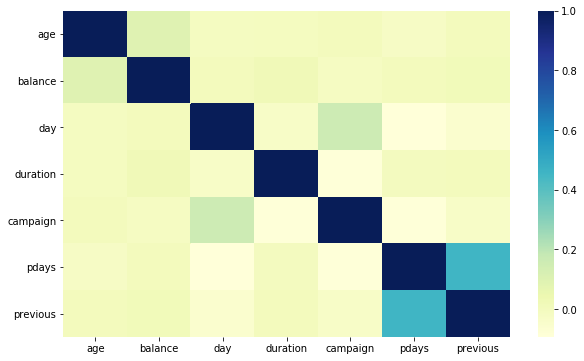

In [93]:
#correlation
correlation = df_label.corr()
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlation,cmap="YlGnBu")

In [111]:
#Create input and target variables
x=df_labeled.drop('y',axis=1)
y=df_labeled['y']

In [113]:
#Create test and train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [124]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 

LogisticRegression accuracy is 0.879
LogisticRegression auc is 0.815
Confusion Matrix : 
 [[7729  217]
 [ 877  220]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [135]:
#XGB Classifier
xgbcl = xgb.XGBClassifier()
xgbcl.fit(X_train, y_train)
y_pred = xgbcl.predict(X_test)

#Evaluate the Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.31%


In [136]:
#RandomForest Classifier
rfc = RandomForestClassifier()
print(rfc)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

#Evaluate the Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy: 89.93%
